Analysis of 911 call data from Kaggle (https://www.kaggle.com/mchirico/montcoalert). 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [34]:
df = pd.read_csv('911.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [36]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


** What are the top 5 zipcodes for 911 calls?

In [37]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 twps for 911 calls?

In [38]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Check how many unique title codes are there? 

In [39]:
df['title'].nunique()

110

** Split EMS, Fire and Traffic in the title column to see which one is the most common reason to call 911.

In [40]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Use seaborn to create a countplot of 911 calls by Reason. 

<AxesSubplot:xlabel='Reason', ylabel='count'>

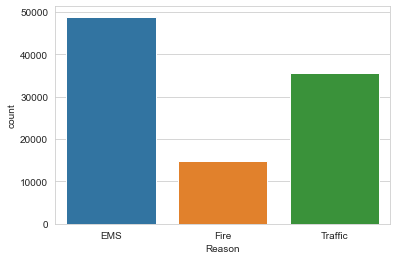

In [41]:
sns.countplot(x='Reason', data=df)

** Check the data type of the objects in the timeStamp column

In [42]:
type(df['timeStamp'].iloc[0])

str

** Convert timeStamp from strings to DateTime objects.

In [43]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Split the timeStamp into "Hour", "Month" and "Day of Week"

In [44]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Map the days of the weeks

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

** Use seaborn to create a countplot of the Day of Week column.

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

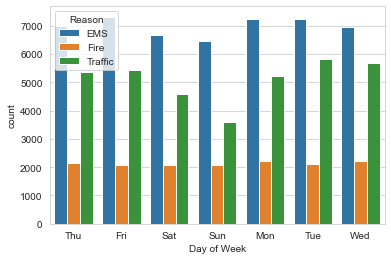

In [46]:
sns.countplot(x=df['Day of Week'], hue=df['Reason'])

** Use Seaborn to create a countplot of the Month column.

<AxesSubplot:xlabel='Month', ylabel='count'>

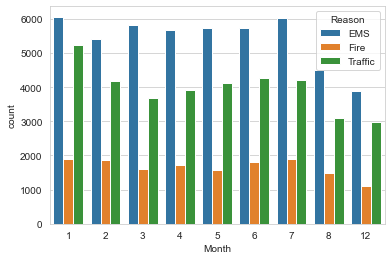

In [47]:
sns.countplot(x=df['Month'], hue=df['Reason'])

** Create a gropuby object called byMonth.

In [48]:
byMonth = df.groupby(['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Plot the dataframe of the count of calls per month. 

<AxesSubplot:xlabel='Month'>

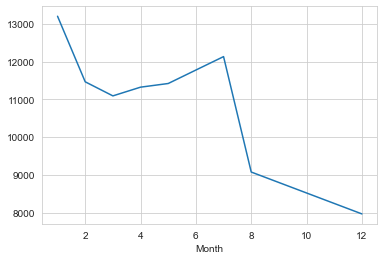

In [49]:
byMonth['twp'].plot()

** Use seaborn's lmplot() to create a linear fit on the number of calls per month.

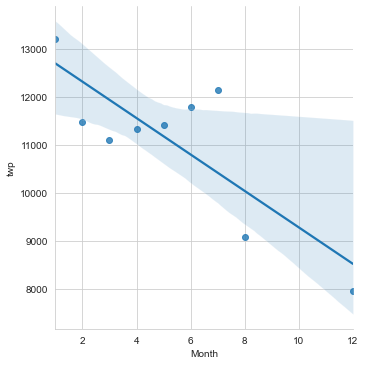

In [50]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

** Create a new column that contains the date from the timeStamp column. And groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

In [51]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())

<AxesSubplot:xlabel='Date'>

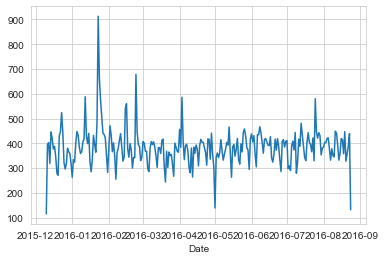

In [52]:
df.groupby(['Date']).count()['twp'].plot()

** Recreate 3 separate plots with each plot representing a Reason for the 911 call.

<AxesSubplot:xlabel='Date'>

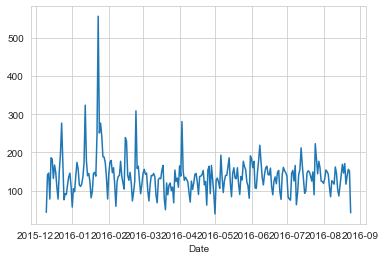

In [53]:
df[df['Reason']=='Traffic'].groupby(['Date']).count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

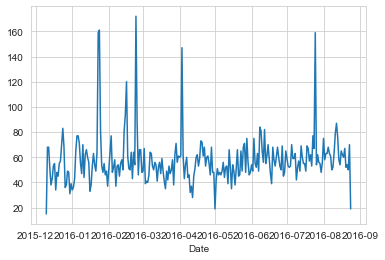

In [54]:
df[df['Reason']=='Fire'].groupby(['Date']).count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

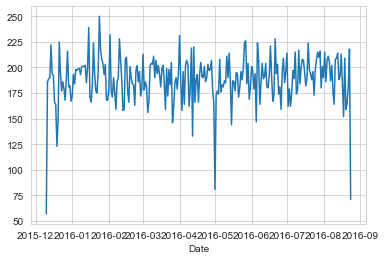

In [55]:
df[df['Reason']=='EMS'].groupby(['Date']).count()['twp'].plot()

** Restructure the columns become the Hours and the Index becomes the Day of the Week. 

In [56]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Create a HeatMap using the new DataFrame.

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

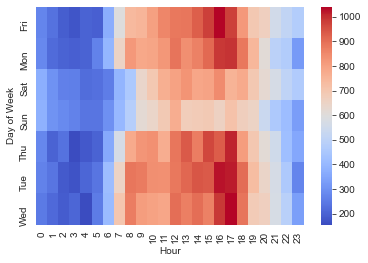

In [57]:
sns.heatmap(dayHour, cmap='coolwarm')

** Create a clustermap using the DataFrame. 

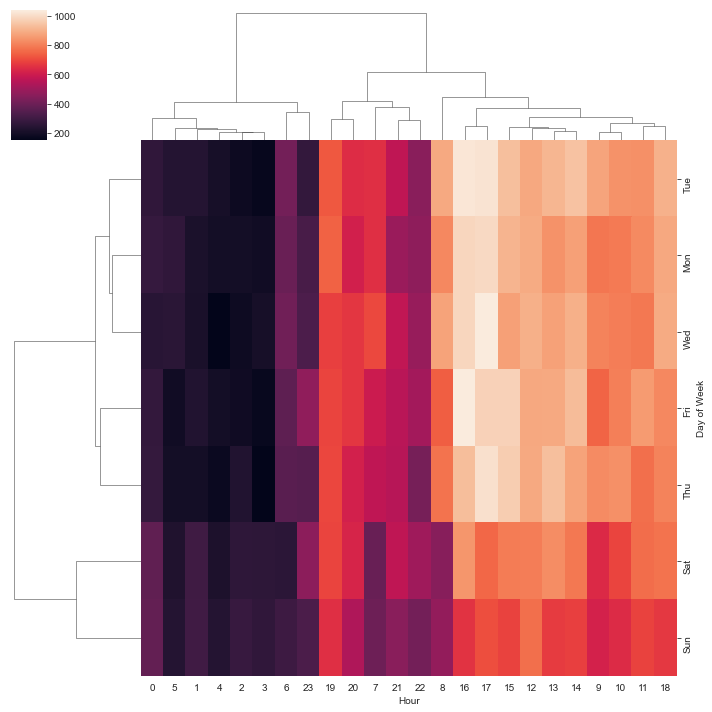

In [58]:
sns.clustermap(dayHour)

** Do the same use the Month as the column. 

In [59]:
monthDay = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
monthDay.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

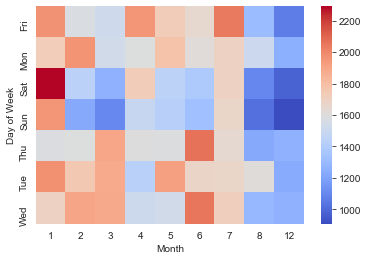

In [60]:
sns.heatmap(monthDay, cmap='coolwarm')

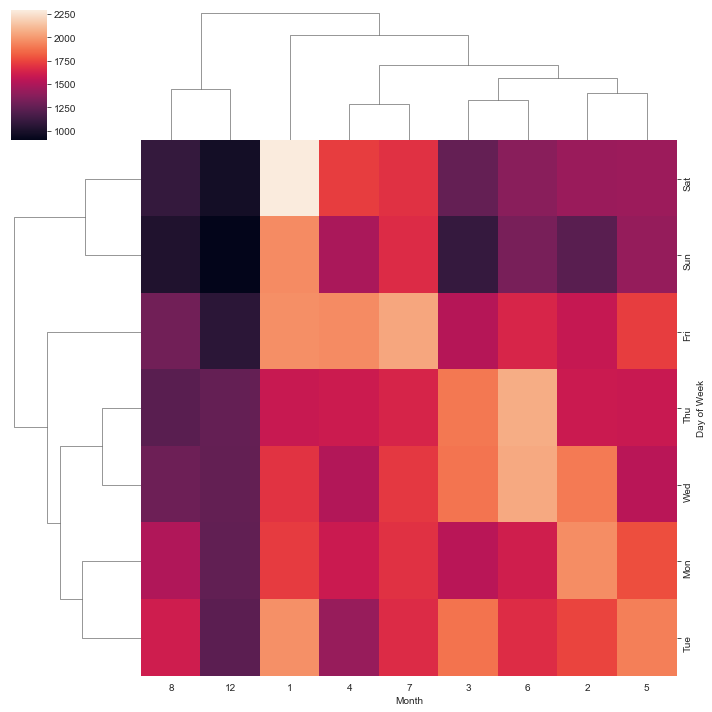

In [61]:
sns.clustermap(monthDay)